In [1]:
## Pip Freezed modules & versions
# Module                 Version
# setuptools             65.5.0
# wheel                  0.37.1
# pandas                 1.5.2
# numpy                  1.23.5
# searbon                0.12.1
# matplotlib             3.6.2
# pillow                 9.3.0
# sklearn
# xgboost                1.7.2

In [2]:
## Essential imports

import os
import random ## For reproducible results
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split,cross_val_score, KFold, StratifiedKFold

In [3]:
random.seed(256)

In [4]:
DATASET_PATH = "../data/new_dataset.csv"

In [5]:
if os.path.exists(DATASET_PATH):
    print(f"[INFO] Loading dataset into Pandas Dataframe")
    data = pd.read_csv(DATASET_PATH, memory_map=True)
    print(f"[INFO] Loaded dataset successfully.")
else:
    print(f"[ERROR] Dataset does not exists or is pointed to wrong path. Please correct the path before moving further.")

[INFO] Loading dataset into Pandas Dataframe
[INFO] Loaded dataset successfully.


In [6]:
data.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,age_of_domain,DNSRecord,web_traffic,Google_Index,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,-1,-1,-1,-1,-1,-1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,-1,-1,1,1,-1,-1,0,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,0,-1,1,1,-1,-1,1,1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,0,-1,1,1,-1,-1,0,1,1,1


In [7]:
"""
Separating training features and target variable
"""

X = data.drop(columns='Result')
Y = pd.DataFrame(data['Result'])

In [8]:
"""
Splitting this data into Train, Test
"""

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.25)

In [9]:
print(f"[INFO] Training Feature Size: {train_X.shape}")
print(f"[INFO] Training Target Size: {train_Y.shape}")
print(f"[INFO] Test Feature Size: {test_X.shape}")
print(f"[INFO] Test Target Size: {test_Y.shape}")

[INFO] Training Feature Size: (8291, 22)
[INFO] Training Target Size: (8291, 1)
[INFO] Test Feature Size: (2764, 22)
[INFO] Test Target Size: (2764, 1)


In [10]:
"""
Utility function for plotting confusion matrix
"""
def plot_confusion_matrix(test_Y, predict_y,labels = None):
    C = confusion_matrix(test_Y, predict_y)
    precision = (((C.T)/(C.sum(axis=1))).T) ## calculating Recall
    recall = (C/C.sum(axis=0)) ## Calculating Precision 
    plt.figure(figsize=(20,4))
    if labels == None:
        labels = [-1,1]
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    plt.subplot(1, 3, 2)
    sns.heatmap(precision, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    plt.subplot(1, 3, 3)
    sns.heatmap(recall, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    plt.show()

# Building Models

### Model 1 - Logistic Regression

In [11]:
accuracy_mapping = {}

In [12]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
model_1 = logistic_regression.fit(train_X,train_Y)

C:\Users\Admin\anaconda3\envs\simplilearn-env\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
logistic_regression_predictions = model_1.predict(test_X)
print(f"Accuracy Score of {LogisticRegression}: {accuracy_score(logistic_regression_predictions,test_Y)}")
accuracy_mapping.update(
    {'LogisticRegression':accuracy_score(logistic_regression_predictions,test_Y)}
)

Accuracy Score of <class 'sklearn.linear_model._logistic.LogisticRegression'>: 0.9301736613603473


In [14]:
print("Classification Report: ")
print(classification_report(logistic_regression_predictions,test_Y))

Classification Report: 
              precision    recall  f1-score   support

          -1       0.90      0.94      0.92      1169
           1       0.95      0.92      0.94      1595

    accuracy                           0.93      2764
   macro avg       0.93      0.93      0.93      2764
weighted avg       0.93      0.93      0.93      2764



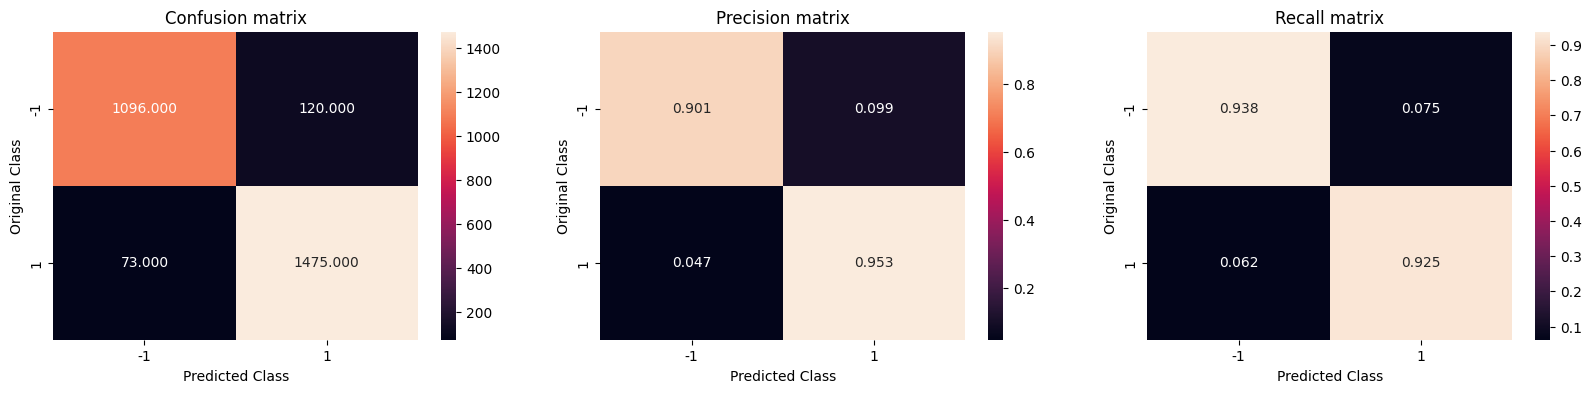

In [15]:
plot_confusion_matrix(test_Y, logistic_regression_predictions)

### Model 2 - Decison Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier()
model_2 = decision_tree_classifier.fit(train_X,train_Y)

In [17]:
decision_tree_predictions = model_2.predict(test_X)
print(f"Accuracy Score of {DecisionTreeClassifier}: {accuracy_score(decision_tree_predictions,test_Y)}")
accuracy_mapping.update(
    {'DecisionTreeClassifier':accuracy_score(decision_tree_predictions,test_Y)}
)

Accuracy Score of <class 'sklearn.tree._classes.DecisionTreeClassifier'>: 0.9580318379160637


In [18]:
print("Classification Report: ")
print(classification_report(decision_tree_predictions,test_Y))

Classification Report: 
              precision    recall  f1-score   support

          -1       0.96      0.95      0.95      1230
           1       0.96      0.97      0.96      1534

    accuracy                           0.96      2764
   macro avg       0.96      0.96      0.96      2764
weighted avg       0.96      0.96      0.96      2764



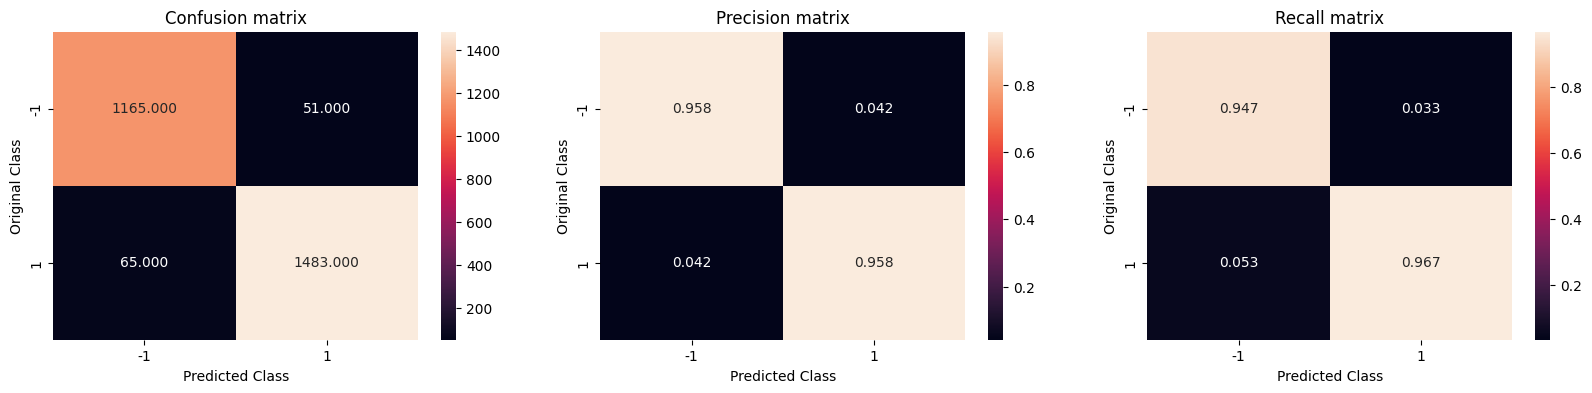

In [19]:
plot_confusion_matrix(test_Y, decision_tree_predictions)

### Model 3 - Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()
model_3 = random_forest_classifier.fit(train_X,train_Y)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10596\2852279468.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_3 = random_forest_classifier.fit(train_X,train_Y)


In [21]:
random_forest_predictions = model_3.predict(test_X)
print(f"Accuracy Score of {RandomForestClassifier}: {accuracy_score(random_forest_predictions,test_Y)}")
accuracy_mapping.update(
    {'RandomForestClassifier':accuracy_score(random_forest_predictions,test_Y)}
)

Accuracy Score of <class 'sklearn.ensemble._forest.RandomForestClassifier'>: 0.9685238784370478


In [22]:
print("Classification Report: ")
print(classification_report(random_forest_predictions,test_Y))

Classification Report: 
              precision    recall  f1-score   support

          -1       0.96      0.97      0.96      1195
           1       0.98      0.97      0.97      1569

    accuracy                           0.97      2764
   macro avg       0.97      0.97      0.97      2764
weighted avg       0.97      0.97      0.97      2764



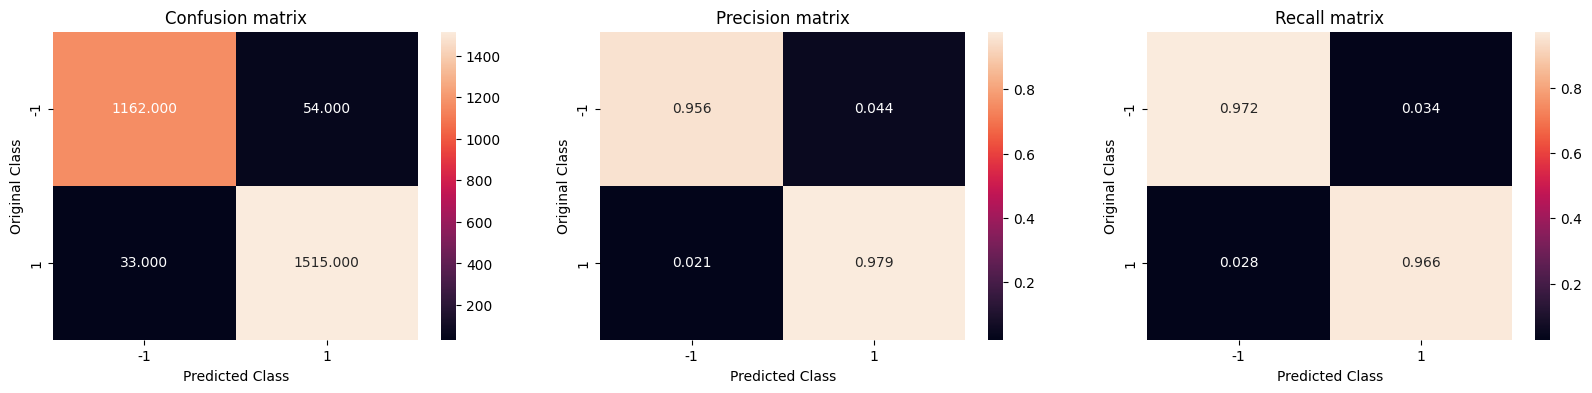

In [23]:
plot_confusion_matrix(test_Y, random_forest_predictions)

### Model 4 - SVM

In [24]:
from sklearn.svm import SVC

support_vector_classifier = SVC()
model_4 = support_vector_classifier.fit(train_X,train_Y)

C:\Users\Admin\anaconda3\envs\simplilearn-env\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
support_vector_classifier_predictions = model_4.predict(test_X)
print(f"Accuracy Score of {SVC}: {accuracy_score(support_vector_classifier_predictions,test_Y)}")
accuracy_mapping.update(
    {'SVC':accuracy_score(support_vector_classifier_predictions,test_Y)}
)

Accuracy Score of <class 'sklearn.svm._classes.SVC'>: 0.9446454413892909


In [26]:
print("Classification Report: ")
print(classification_report(support_vector_classifier_predictions,test_Y))

Classification Report: 
              precision    recall  f1-score   support

          -1       0.91      0.96      0.94      1161
           1       0.97      0.94      0.95      1603

    accuracy                           0.94      2764
   macro avg       0.94      0.95      0.94      2764
weighted avg       0.95      0.94      0.94      2764



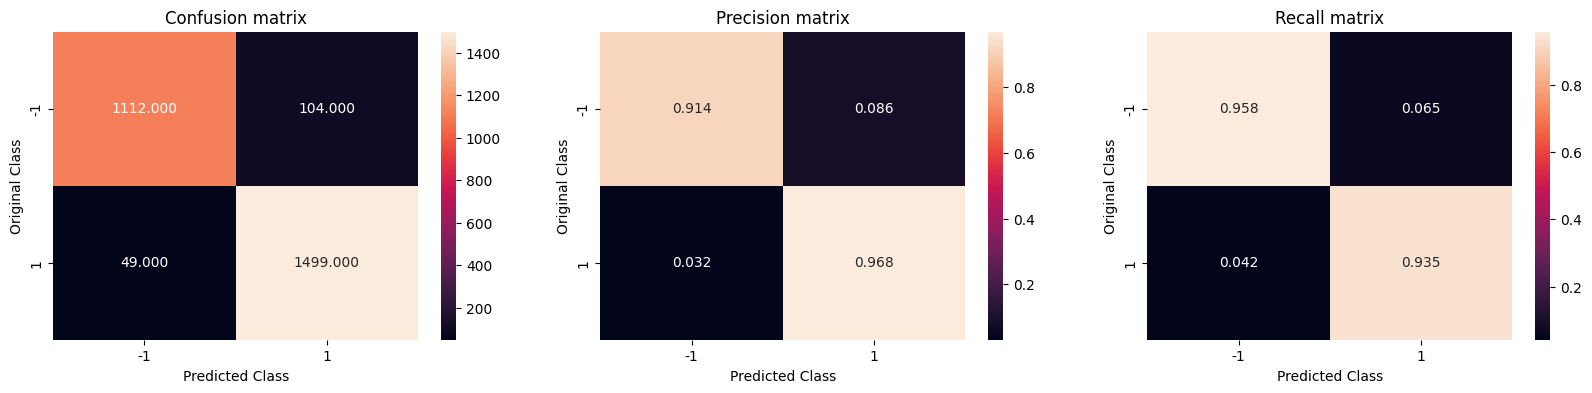

In [27]:
plot_confusion_matrix(test_Y, support_vector_classifier_predictions)

### Model 5 - AdaBoost Classifier

In [28]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_classifier = AdaBoostClassifier()
model_5 = ada_boost_classifier.fit(train_X,train_Y)

C:\Users\Admin\anaconda3\envs\simplilearn-env\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
ada_boost_classifier_predictions = model_5.predict(test_X)
print(f"Accuracy Score of {AdaBoostClassifier}: {accuracy_score(ada_boost_classifier_predictions,test_Y)}")
accuracy_mapping.update(
    {'AdaBoostClassifier':accuracy_score(ada_boost_classifier_predictions,test_Y)}
)

Accuracy Score of <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>: 0.9384949348769899


In [30]:
print("Classification Report: ")
print(classification_report(ada_boost_classifier_predictions,test_Y))

Classification Report: 
              precision    recall  f1-score   support

          -1       0.91      0.95      0.93      1170
           1       0.96      0.93      0.95      1594

    accuracy                           0.94      2764
   macro avg       0.94      0.94      0.94      2764
weighted avg       0.94      0.94      0.94      2764



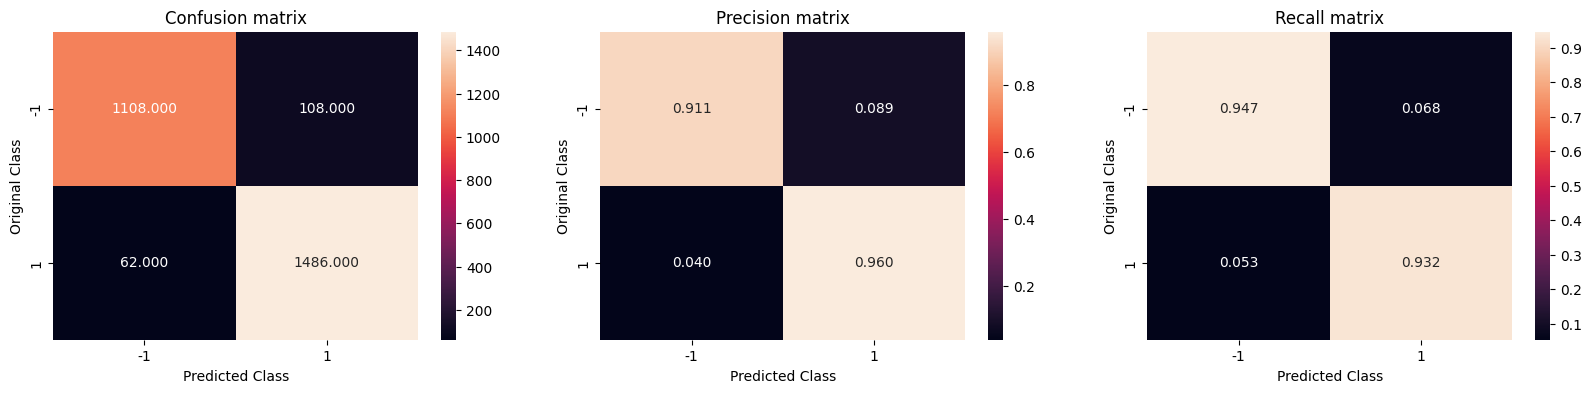

In [31]:
plot_confusion_matrix(test_Y, ada_boost_classifier_predictions)

### Model 6 - KNN Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
model_6 = knn_classifier.fit(train_X,train_Y)

C:\Users\Admin\anaconda3\envs\simplilearn-env\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [33]:
knn_classifier_predictions = model_6.predict(test_X)
print(f"Accuracy Score of {KNeighborsClassifier}: {accuracy_score(knn_classifier_predictions,test_Y)}")
accuracy_mapping.update(
    {'KNeighborsClassifier':accuracy_score(knn_classifier_predictions,test_Y)}
)

Accuracy Score of <class 'sklearn.neighbors._classification.KNeighborsClassifier'>: 0.9384949348769899


In [34]:
print("Classification Report: ")
print(classification_report(knn_classifier_predictions,test_Y))

Classification Report: 
              precision    recall  f1-score   support

          -1       0.93      0.93      0.93      1208
           1       0.95      0.94      0.95      1556

    accuracy                           0.94      2764
   macro avg       0.94      0.94      0.94      2764
weighted avg       0.94      0.94      0.94      2764



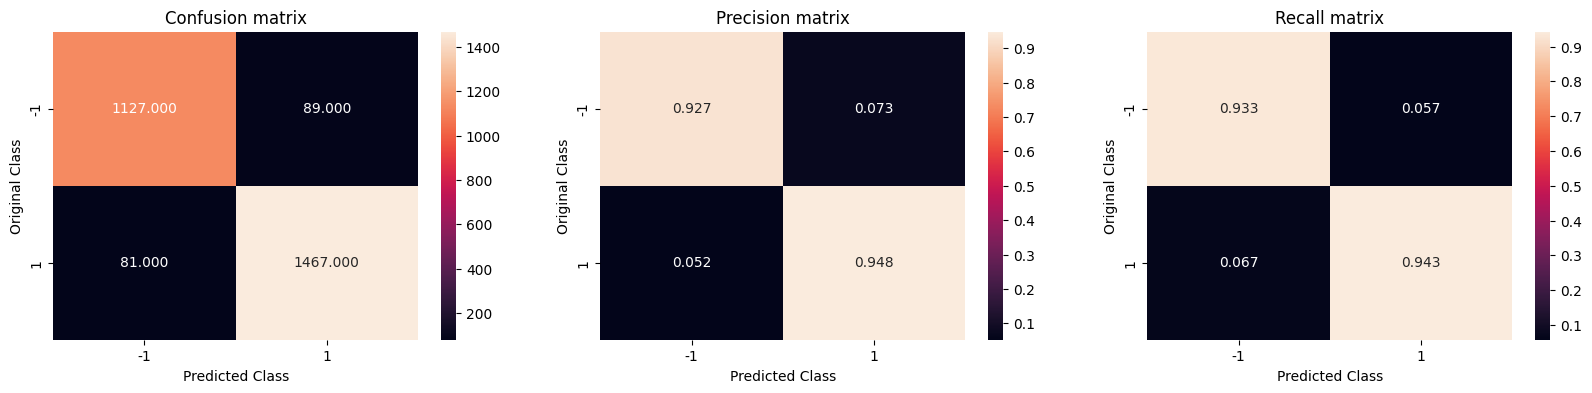

In [35]:
plot_confusion_matrix(test_Y, knn_classifier_predictions)

## Results of all 6 models

In [36]:
for model,score in accuracy_mapping.items():
    print(f"Model - {model:30} -> Score - {score: 10}")

Model - LogisticRegression             -> Score -  0.9301736613603473
Model - DecisionTreeClassifier         -> Score -  0.9580318379160637
Model - RandomForestClassifier         -> Score -  0.9685238784370478
Model - SVC                            -> Score -  0.9446454413892909
Model - AdaBoostClassifier             -> Score -  0.9384949348769899
Model - KNeighborsClassifier           -> Score -  0.9384949348769899


"""

    Best 2 models are:
        1. Decision Tree Classifier
        2. Random Forest Classifier

"""

### Model Validation with K-Fold for best models

In [37]:
kf = StratifiedKFold(n_splits=5, shuffle=True)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(train_X, train_Y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 6632, Test set:1659
Fold:2, Train set: 6633, Test set:1658
Fold:3, Train set: 6633, Test set:1658
Fold:4, Train set: 6633, Test set:1658
Fold:5, Train set: 6633, Test set:1658


In [38]:
scores = cross_val_score(RandomForestClassifier(), train_X, train_Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {scores}')
print(f'Average score: {"{:.2f}".format(scores.mean())}')

C:\Users\Admin\anaconda3\envs\simplilearn-env\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\envs\simplilearn-env\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\envs\simplilearn-env\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\envs\simplilearn-env\lib\site-packages\skl

Scores for each fold are: [0.95298373 0.95898673 0.96139928 0.96863691 0.9535585 ]
Average score: 0.96


In [39]:
scores = cross_val_score(DecisionTreeClassifier(), train_X, train_Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {scores}')
print(f'Average score: {"{:.2f}".format(scores.mean())}')

Scores for each fold are: [0.933695   0.95235223 0.96079614 0.94752714 0.95054282]
Average score: 0.95


"""

Even with K-Fold, we get similar results. This shows our data was trained evenly.

"""

### Plotting ROC Curve for Random Forest

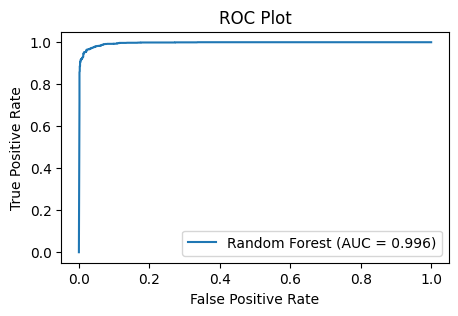

In [40]:
wrong_probabilities = [0 for _ in range(len(test_Y))]

random_forest_probabilities = model_3.predict_proba(test_X)[:,1]
random_forest_auc_score = roc_auc_score(test_Y, random_forest_probabilities)
random_forest_false_predictions, random_forest_true_predictions, _ = roc_curve(test_Y, random_forest_probabilities)

plt.figure(figsize=(5, 3))
plt.plot(random_forest_false_predictions, random_forest_true_predictions, label='Random Forest (AUC = %0.3f)' % random_forest_auc_score)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()  
plt.show()

### Plotting ROC Curve for Decision Tree

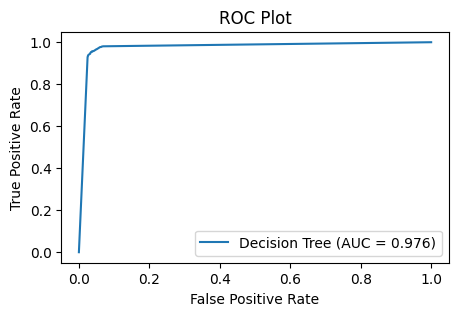

In [41]:
wrong_probabilities = [0 for _ in range(len(test_Y))]

decision_tree_probabilities = model_2.predict_proba(test_X)[:,1]
decision_tree_auc_score = roc_auc_score(test_Y, decision_tree_probabilities)
decision_tree_false_predictions, decision_tree_true_predictions, _ = roc_curve(test_Y, decision_tree_probabilities)

plt.figure(figsize=(5, 3))
plt.plot(decision_tree_false_predictions, decision_tree_true_predictions, label='Decision Tree (AUC = %0.3f)' % decision_tree_auc_score)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()  
plt.show()

# Final Model


We select Random Forest as our final model since it has good f1 score, Precision, Recall, & greater ROC score.

It outstands all other models, thus we can use it to derive our final Test predictions.

In [42]:
import joblib

# joblib.dump(model_3,"./random_forest_model.pkl") ## Roughly 9Mb
joblib.dump(model_3,"./random_forest_model_compressed.pkl",compress=3) ## 1.5 Mb & Much Faster

['./random_forest_model_compressed.pkl']

### Loading & Inference from the model

In [43]:
loaded_model = joblib.load("./random_forest_model_compressed.pkl")

In [44]:
test_prediction = loaded_model.predict([test_X.iloc[0]])

C:\Users\Admin\anaconda3\envs\simplilearn-env\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [45]:
print(test_prediction)

[1]


In [46]:
import numpy as np
test_prediction2 = loaded_model.predict([np.array(test_X.iloc[0])])

C:\Users\Admin\anaconda3\envs\simplilearn-env\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [47]:
test_prediction2

array([1], dtype=int64)

### Input Requirements

To test the model successfully, we need to have the following shape of input vector where each index corresponds to the associated column name.

In [8]:
for index,column_name in enumerate(X.columns):
    print(f"Index: {index:2}, should be for: {column_name:20}")

Index:  0, should be for: having_IPhaving_IP_Address
Index:  1, should be for: URLURL_Length       
Index:  2, should be for: Shortining_Service  
Index:  3, should be for: having_At_Symbol    
Index:  4, should be for: double_slash_redirecting
Index:  5, should be for: Prefix_Suffix       
Index:  6, should be for: having_Sub_Domain   
Index:  7, should be for: SSLfinal_State      
Index:  8, should be for: Domain_registeration_length
Index:  9, should be for: Favicon             
Index: 10, should be for: HTTPS_token         
Index: 11, should be for: Request_URL         
Index: 12, should be for: URL_of_Anchor       
Index: 13, should be for: Links_in_tags       
Index: 14, should be for: SFH                 
Index: 15, should be for: Submitting_to_email 
Index: 16, should be for: Abnormal_URL        
Index: 17, should be for: age_of_domain       
Index: 18, should be for: DNSRecord           
Index: 19, should be for: web_traffic         
Index: 20, should be for: Google_Index     